(-5.0, 5.0)

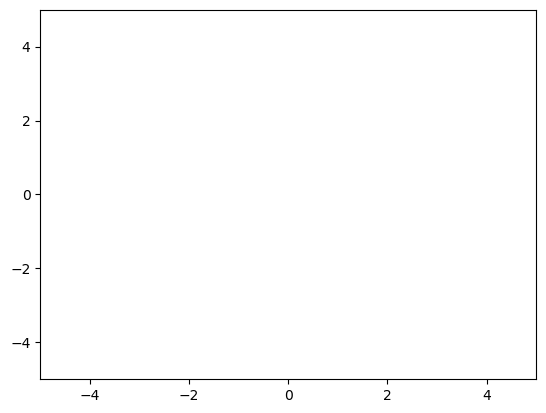

In [ ]:
fig = plt.figure()
l = plt.plot([], [], 'k-')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def update(x):"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
    return np.sin(x) * 3

xlist = np.linspace(-5, 5, 100)
ylist = update(xlist)

l.set_data(xlist, ylist)
plt.show()

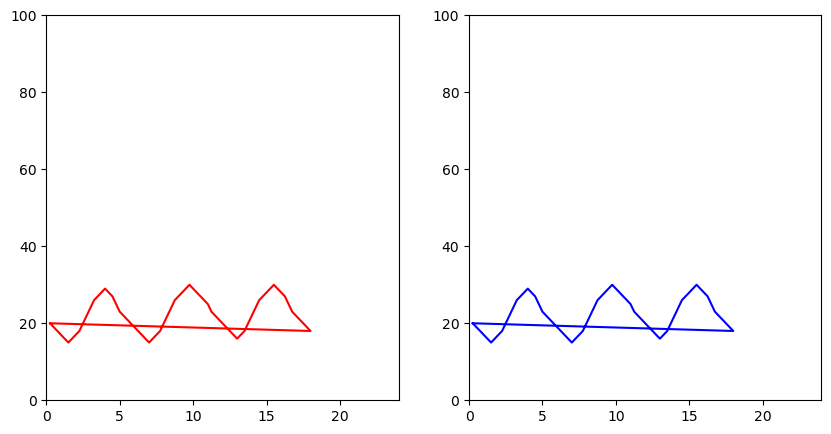

In [21]:


from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
import pandas as pd

temp_df = pd.read_csv("./data/temps.csv")
memory_df = pd.read_csv("./data/cpu.csv")

temp_x = []
temp_y = []

memory_x = []
memory_y = []

figure, (l_ax, r_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Set the limits on the axes you are using for the animation
l_ax.set_xlim(0, 24)
l_ax.set_ylim(0, 100)

r_ax.set_xlim(0, 24)
r_ax.set_ylim(0, 100)

# Initialize lines for both subplots
l_line, = l_ax.plot([], [], 'r-')  # Let's use red solid line for left plot
r_line, = r_ax.plot([], [], 'b-')  # Let's use blue solid line for right plot

def animation_function(i):
    temp = int(temp_df.iloc[i]["Temperature"])
    time = temp_df.iloc[i]["Hour"]

    temp_x.append(time)
    temp_y.append(temp)

    memory = int(memory_df.iloc[i]["CPU_Usage"])
    time = memory_df.iloc[i]["Timestamp"]

    memory_x.append(time)
    memory_y.append(memory)

    # Update data for both lines
    l_line.set_xdata(temp_x)
    l_line.set_ydata(temp_y)
    
    r_line.set_xdata(memory_x)
    r_line.set_ydata(memory_y)
    
    return l_line, r_line,

animation = FuncAnimation(figure,
                          func=animation_function,
                          frames=np.arange(0, 92, 1),
                          interval=100)
html = animation.to_html5_video()
HTML(html)  # This will display the animation in a Jupyter Notebook environment

